## Homework 3: Reproducibility in Climate Studies

- Statistics 159/259, Spring 2022
- Due 03/23/2023, 23:59PM PT
- Prof. F. Pérez and GSI F. Sapienza, Department of Statistics, UC Berkeley.
- This assignment is worth a maximum of 50 points.
- Assignment type: group homework assignment (Check on Ed Discussion about group's assignments).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

/tmp/ipykernel_4389/187724789.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

Subset all the data to just the West Coast region

In [3]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds

<xarray.Dataset>
Dimensions:           (time: 6443, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

### Question 5 [10 points]

Reproduce one of the images in Figure 2. If you feel adventurous, you can make more than one!

In [4]:
filtered_data = ds.analysed_sst.sel(time = slice('2002', '2012'))

In [5]:
five_day = filtered_data.rolling(time=5, center=True).mean()

In [6]:
climatology = five_day.groupby('time.dayofyear').mean(skipna=True)

In [7]:
full_data = ds.analysed_sst.sel(time = slice('2002', '2016')) 
sst_anomalies = full_data.groupby('time.dayofyear') - climatology

In [8]:
peak_month = sst_anomalies.idxmax(dim='time', skipna=True).dt.month

NameError: name 'annotate_map' is not defined

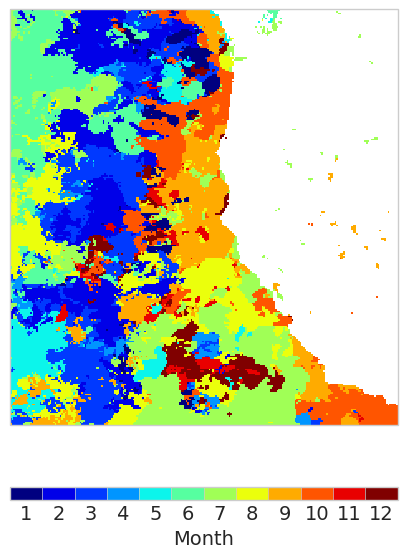

In [12]:
def fig2b(ax):
    # colorbar customization
    cbar_kwargs = {
        'location': 'bottom',
        'orientation': 'horizontal',
        'pad': 0.1,
        'aspect': 30,
        'label': 'Month',
        'ticks': np.arange(13),
        'drawedges': True,
        'boundaries': np.arange(0.5,13.5)
    }
    
    peak_month.plot(ax=ax, transform=crs, cmap='jet',
                    cbar_kwargs=cbar_kwargs)
    annotate_map(ax, letter='b')

fig = plt.figure(figsize=(5, 8))
ax = plt.subplot(projection=crs)
fig2b(ax)
#fig.savefig("outputs/Q05b.png", bbox_inches="tight")

In [5]:
climatology = ds.sel(time=slice("2002-01", "2016-07")).groupby("time.month").mean("time")

In [ ]:
sst_anomalies = ds.groupby("time.month") - climatology
#sst_anomalies_5day = sst_anomalies.rolling(time=5, center=True).mean()
#max_sst_anomalies_5day = sst_anomalies_5day.max("time")

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
max_sst_anomalies_5day.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="coolwarm")
ax.coastlines()
ax.set_title("Maximum 5-day average SST anomaly (2002-2016)")
plt.show()

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

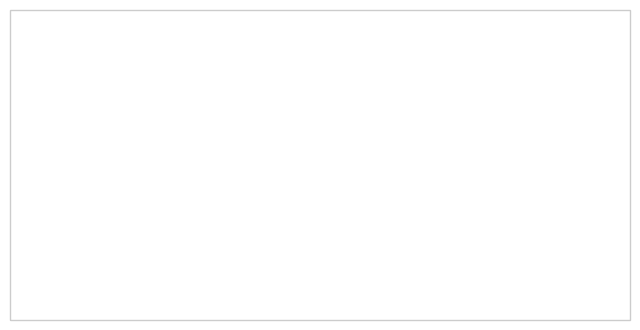

In [27]:
dt = ds.sel(time=slice("2002-01","2016-07")).analysed_sst.idxmax("time").dt.month.plot()
ax = plt.subplot(projection=crs)
ds.plot(ax=ax, transform=crs)
ax.coastlines("10m", color="k")
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))